In [1]:
import numpy as np

import ibis
from ibis.expr import operations as ops
from ibis.expr import types as ir
from ibis.expr import datatypes as dt
import pandas as pd

# local
from settings import conf
from utils import cursor2df

### setup

In [2]:
table_name = 'functional_alltypes'

## mysql

In [14]:
con = ibis.mysql.connect(**conf['mysql'])
t = con.table(table_name)

print('accessing directly') 
sql = 'SELECT _rowid FROM {} limit 5'.format(table_name)
for v in con.con.execute(sql):
    print(v)
    

accessing directly


InternalError: (pymysql.err.InternalError) (1054, "Unknown column '_rowid' in 'field list'")
[SQL: SELECT _rowid FROM functional_alltypes limit 5]
(Background on this error at: http://sqlalche.me/e/2j85)

### sqlite

In [3]:
con = ibis.sqlite.connect(**conf['sqlite'])
t = con.table(table_name)

print('accessing directly') 
sql = 'SELECT (rowid - 1) as rowid FROM {} limit 5'.format(table_name)
for v in con.con.execute(sql):
    print(v)
    

print('accessing via neasted select')
sql = 'SELECT (rowid - 1) as rowid FROM (select * from {}) limit 5'.format(table_name)
for v in con.con.execute(sql):
    print(v)    

accessing directly
(0,)
(1,)
(2,)
(3,)
(4,)
accessing via neasted select
(None,)
(None,)
(None,)
(None,)
(None,)


In [4]:
row_id = t.row_id('rowid')
expr = t[row_id, t.index].head()
print(expr.compile())
expr.execute()

> /home/xmn/dev/quansight/ibis-project/ibis/ibis/expr/operations.py(277)_make_expr()
-> return klass(self, name=self.name)


(Pdb)  p klass


functools.partial(<class 'ibis.expr.types.IntegerColumn'>, dtype=int64)


(Pdb)  p self.name


'rowid'


(Pdb)  klass(self, name=self.name)


ref_0
SQLiteTable[table]
  name: functional_alltypes
  schema:
    index : int64
    Unnamed: 0 : int64
    id : int64
    bool_col : boolean
    tinyint_col : int64
    smallint_col : int64
    int_col : int64
    bigint_col : int64
    float_col : float64
    double_col : float64
    date_string_col : string
    string_col : string
    timestamp_col : string
    year : int64
    month : int64

rowid = Column[int64*] 'rowid' from table
  ref_0


(Pdb)  C


*** NameError: name 'C' is not defined


(Pdb)  c


SELECT rowid - ? AS rowid, t0."index" 
FROM base.functional_alltypes AS t0
 LIMIT ? OFFSET ?


rowid  index
0      0      0
1      1      1
2      2      2
3      3      3
4      4      4

### omniscidb rowid

In [5]:
con = ibis.omniscidb.connect(**conf['omniscidb'])

In [6]:
con.list_tables()

['diamonds', 'batting', 'awards_players', 'functional_alltypes', 'geo']

In [7]:
sql = 'SELECT rowid as rowid FROM functional_alltypes'
cursor2df(con.con.execute(sql))

rowid
0         0
1         1
2         2
3         3
4         4
...     ...
7295   7295
7296   7296
7297   7297
7298   7298
7299   7299

[7300 rows x 1 columns]

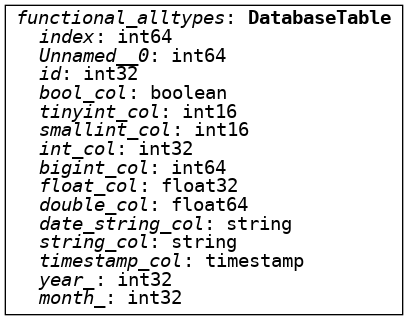

In [8]:
t = con.table('functional_alltypes')
t

In [9]:
row_id = t.row_id('rowid')
t[row_id].execute()


> /home/xmn/dev/quansight/ibis-project/ibis/ibis/expr/operations.py(277)_make_expr()
-> return klass(self, name=self.name)


(Pdb)  c


rowid
0         0
1         1
2         2
3         3
4         4
...     ...
7295   7295
7296   7296
7297   7297
7298   7298
7299   7299

[7300 rows x 1 columns]

In [10]:
t[row_id].execute()

rowid
0         0
1         1
2         2
3         3
4         4
...     ...
7295   7295
7296   7296
7297   7297
7298   7298
7299   7299

[7300 rows x 1 columns]

In [11]:
t2 = t.mutate(b=1000)
row_id = t2.row_id('rowid')
t2[row_id].head().execute()

NotImplementedError: Pseudocolumns operations cannot be used for a table selection. Use it directly on a table expresion.

In [ ]:
len(np.arange(1000))

### postgresql rowid

In [ ]:
# https://www.postgresql.org/docs/8.1/datatype-oid.html
sql = 'SELECT oid FROM functional_alltypes limit 5'
con = ibis.postgres.connect(**conf['postgres'])
t = con.table(table_name)
# for v in con.con.execute(sql):
#     print(v)

### mysql rowid

In [ ]:
# https://oracle-abc.wikidot.com/pseudo-column
sql = 'SELECT rowid FROM {} limit 5'.format(table_name)
con = ibis.mysql.connect(**conf['mysql'])

# for v in con.con.execute(sql):
#    print(v)